In [3]:
from sklearn import preprocessing
from sklearn.externals import joblib
import sklearn as skl
from sklearn import tree
from collections import defaultdict
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
from sklearn.metrics import accuracy_score
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import classification_report 
%matplotlib inline
import time
import warnings
# 5-class classification version
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, zero_one_loss, accuracy_score
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', 100)

In [4]:
data_root_dir = r'D:\CIC\Train and Test\Filtered Corr Attr'
# Load all the training and testing data
X_train = pd.read_pickle(f'{data_root_dir}\X_train.pkl')
X_test = pd.read_pickle(f'{data_root_dir}\X_test.pkl')
y_test = pd.read_pickle(f'{data_root_dir}\y_test.pkl')
y_train = pd.read_pickle(f'{data_root_dir}\y_train.pkl')

In [5]:
# Timer to see how long it takes to test the algorithm
startTime = time.perf_counter()

dt_classifier = DecisionTreeClassifier(random_state=10)
dt_classifier.fit(X_train, y_train)

y_pred_dt = dt_classifier.predict(X_test)

dt_results = confusion_matrix(y_test, y_pred_dt)
dt_error = zero_one_loss(y_test, y_pred_dt)
dt_score = accuracy_score(y_test, y_pred_dt) * 100
dt_report = classification_report(y_test, y_pred_dt)

# Print endTime - startTime to calculate how long it takes
endTime = time.perf_counter()

In [6]:
print(f"Total time: {endTime - startTime:0.4f} seconds \n")
print("Decision Tree Classifier Results")
print("=================================================")
print(f"Confusion Matrix:")
print(f"{dt_results[0]}")
print(f"{dt_results[1]} \n")

print("Report :")
print(dt_report) 

print(f"True Postive   : {dt_results[0][0]}")
print(f"False Positive : {dt_results[0][1]}")
print(f"False Negative : {dt_results[1][0]}")
print(f"True Negative  : {dt_results[1][1]}")
print(f"Error Value    : {dt_error}")
print(f"Accuracy_Score : {dt_score}")
print("=================================================")

Total time: 1870.7250 seconds 

Decision Tree Classifier Results
Confusion Matrix:
[3987159   29511]
[ 42410 782093] 

Report :
              precision    recall  f1-score   support

           0       0.99      0.99      0.99   4016670
           1       0.96      0.95      0.96    824503

    accuracy                           0.99   4841173
   macro avg       0.98      0.97      0.97   4841173
weighted avg       0.99      0.99      0.99   4841173

True Postive   : 3987159
False Positive : 29511
False Negative : 42410
True Negative  : 782093
Error Value    : 0.014856110285668356
Accuracy_Score : 98.51438897143316


In [7]:
feature_importances = pd.Series(dt_classifier.feature_importances_, index=X_test.columns)
print('Feature importances sorted:')
print('---------------------------------')
feature_importances.nlargest(50)

Feature importances sorted:
---------------------------------


Dst Port             0.299570
TotLen Fwd Pkts      0.204303
Fwd Seg Size Min     0.100592
Flow Duration        0.088819
Init Fwd Win Byts    0.066275
Bwd Pkt Len Mean     0.059560
Fwd IAT Tot          0.046250
Fwd Pkts/s           0.036801
Fwd IAT Std          0.028251
Flow IAT Min         0.021889
Fwd IAT Mean         0.004651
Flow IAT Std         0.003384
Flow IAT Mean        0.003305
Fwd Header Len       0.002811
Bwd Pkts/s           0.002692
Flow IAT Max         0.002682
Flow Byts/s          0.002401
Bwd Header Len       0.002023
Flow Pkts/s          0.001797
URG Flag Cnt         0.001767
Fwd IAT Min          0.001711
Fwd IAT Max          0.001523
Bwd IAT Min          0.001202
Subflow Fwd Pkts     0.001162
PSH Flag Cnt         0.001093
Init Bwd Win Byts    0.001051
Bwd IAT Std          0.000968
Fwd Pkt Len Max      0.000891
Bwd IAT Tot          0.000823
Bwd IAT Max          0.000797
Fwd Pkt Len Mean     0.000714
Idle Min             0.000672
Bwd IAT Mean         0.000610
FIN Flag C

Top 20 features:
---------------------------------
Dst Port             0.299570
TotLen Fwd Pkts      0.204303
Fwd Seg Size Min     0.100592
Flow Duration        0.088819
Init Fwd Win Byts    0.066275
Bwd Pkt Len Mean     0.059560
Fwd IAT Tot          0.046250
Fwd Pkts/s           0.036801
Fwd IAT Std          0.028251
Flow IAT Min         0.021889
Fwd IAT Mean         0.004651
Flow IAT Std         0.003384
Flow IAT Mean        0.003305
Fwd Header Len       0.002811
Bwd Pkts/s           0.002692
Flow IAT Max         0.002682
Flow Byts/s          0.002401
Bwd Header Len       0.002023
Flow Pkts/s          0.001797
URG Flag Cnt         0.001767
dtype: float64


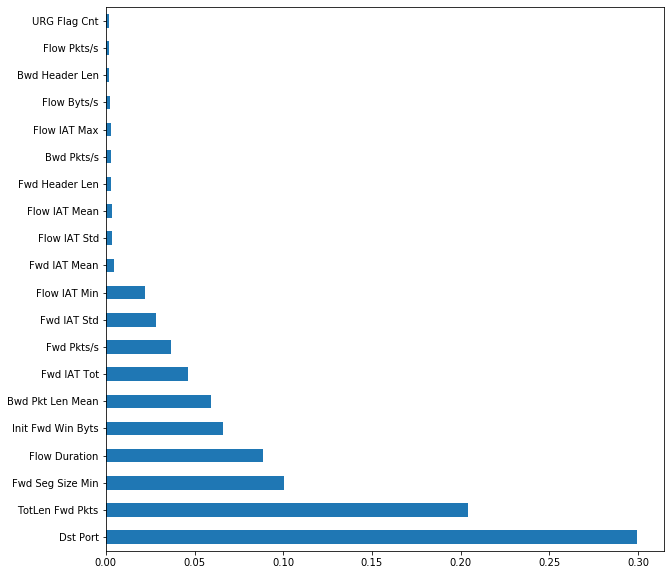

In [8]:
print('Top 20 features:')
print('---------------------------------')
feature_importances.nlargest(20).plot(kind='barh', figsize=(10,10))
print(feature_importances.nlargest(20))

Least 20 features:
---------------------------------
Fwd URG Flags        0.000000e+00
Protocol             9.183629e-08
SYN Flag Cnt         1.125782e-06
Fwd PSH Flags        7.370292e-06
Fwd Act Data Pkts    3.398321e-05
Tot Fwd Pkts         3.879783e-05
Fwd Pkt Len Min      4.393999e-05
RST Flag Cnt         4.505837e-05
Pkt Len Min          4.726101e-05
ECE Flag Cnt         7.528176e-05
Tot Bwd Pkts         9.506670e-05
CWE Flag Count       1.311391e-04
Bwd Pkt Len Min      1.433766e-04
Subflow Bwd Byts     1.454702e-04
Fwd Seg Size Avg     1.747411e-04
TotLen Bwd Pkts      1.775321e-04
Pkt Len Var          2.016148e-04
Active Std           2.215156e-04
Pkt Size Avg         2.408493e-04
Pkt Len Std          2.840904e-04
dtype: float64


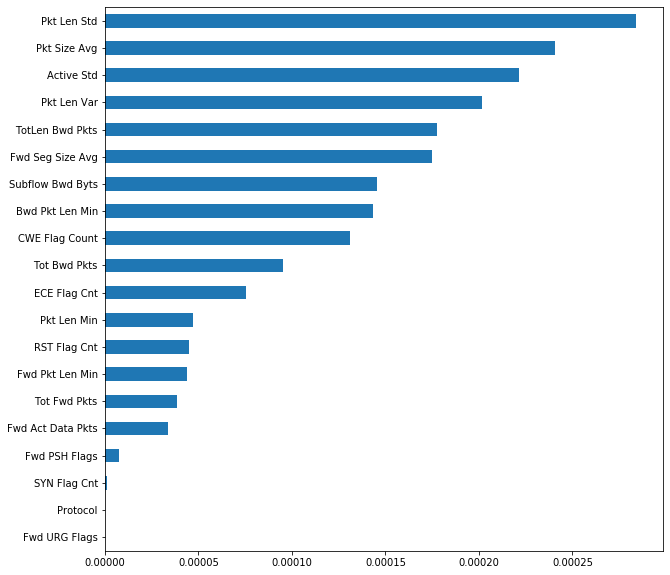

In [9]:
print('Least 20 features:')
print('---------------------------------')
feature_importances.nsmallest(20).plot(kind='barh', figsize=(10,10))
print(feature_importances.nsmallest(20))

In [11]:
model_file_path = r'D:\CIC\Train and Test\Filtered Corr Attr\decision_tree_model.sav'
pickle.dump(dt_classifier, open(model_file_path, 'wb'))